In [39]:
import pandas as pd
import numpy as np
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import KFold  
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
data = sklearn.datasets.load_breast_cancer(as_frame=True)
cancer_data = data.frame
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [41]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Kfold

In [72]:
k_fold = KFold(n_splits = 5,shuffle=True ,random_state=42)
model = RandomForestClassifier(n_estimators=20,random_state=42)

In [73]:
x = cancer_data.drop(["target"], axis = 1)
y= cancer_data["target"] 


In [74]:
acc_scores = []
for training_index, testing_index in k_fold.split(x):  
    x_train, x_test = x.iloc[training_index,:], x.iloc[testing_index,:]  
    y_train, y_test = y.iloc[training_index] , y.iloc[testing_index]
    model.fit(x_train,y_train)
    Y_pred = model.predict(x_test) 
    acc = accuracy_score(Y_pred , y_test)  
    acc_scores.append(acc)

mean_acc_score = sum(acc_scores) / 5  
   
print("Accuracy score of each fold: ", acc_scores)  
print("Mean accuracy score: ", mean_acc_score) 

Accuracy score of each fold:  [0.956140350877193, 0.9736842105263158, 0.9385964912280702, 0.9649122807017544, 0.9646017699115044]
Mean accuracy score:  0.9595870206489675


### PCA 

In [42]:
x = cancer_data.drop(["target"], axis = 1)
y= cancer_data["target"]
reduction = PCA(n_components=5)
reduction.fit(x)
x= reduction.transform(x)
x= pd.DataFrame(x,columns=["p1","p2","p3","p4","p5"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#### Decission Tree

In [43]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy_score(np.array(y_test),prediction,normalize=True)

0.935672514619883

<AxesSubplot: ylabel='Density'>

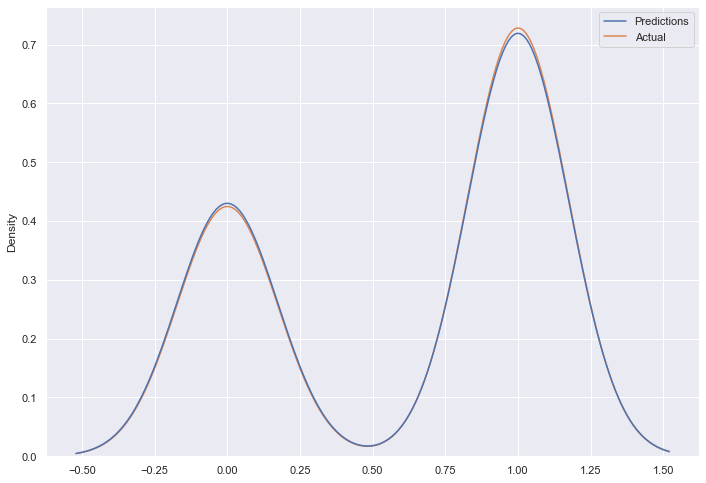

In [44]:
results = pd.DataFrame(prediction, columns = ['Predictions'])
results["Actual"] = list(y_test)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

#### Random Forest

In [4]:
model = RandomForestClassifier(n_estimators=20,random_state=42)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy_score(np.array(y_test),prediction,normalize=True)

0.9649122807017544

<AxesSubplot: ylabel='Density'>

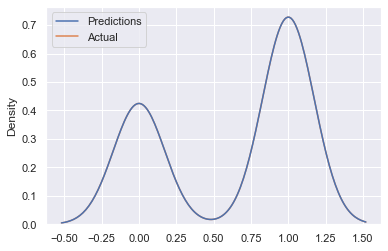

In [5]:
results = pd.DataFrame(prediction, columns = ['Predictions'])
results["Actual"] = list(y_test)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

#### SVC

In [6]:
model= svm.SVC()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy_score(np.array(y_test),prediction,normalize=True)

0.9532163742690059

<AxesSubplot: ylabel='Density'>

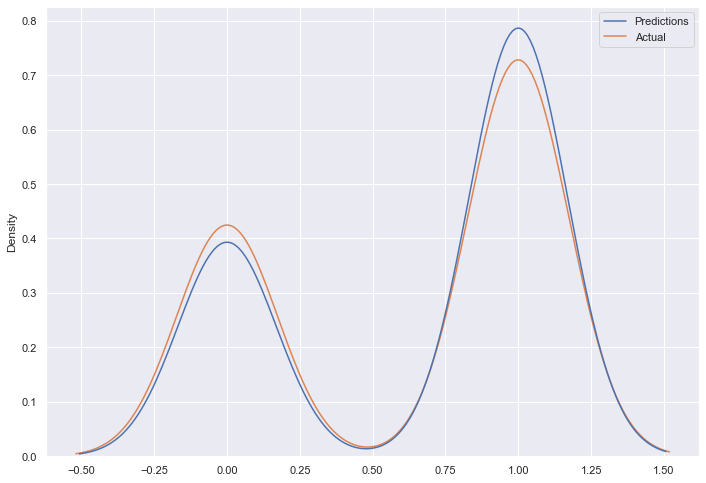

In [7]:
results = pd.DataFrame(prediction, columns = ['Predictions'])
results["Actual"] = list(y_test)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

#### KNN

In [31]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy_score(np.array(y_test),prediction,normalize=True)

0.9590643274853801

<AxesSubplot: ylabel='Density'>

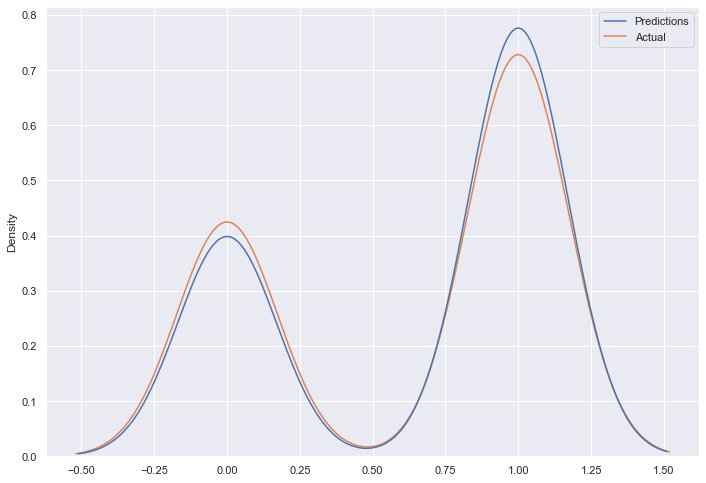

In [32]:
results = pd.DataFrame(prediction, columns = ['Predictions'])
results["Actual"] = list(y_test)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

#### KMeans

In [8]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model.fit(x_train)
prediction = model.predict(x_test)
accuracy_score(np.array(y_test),prediction,normalize=True)

0.12280701754385964

<AxesSubplot: ylabel='Density'>

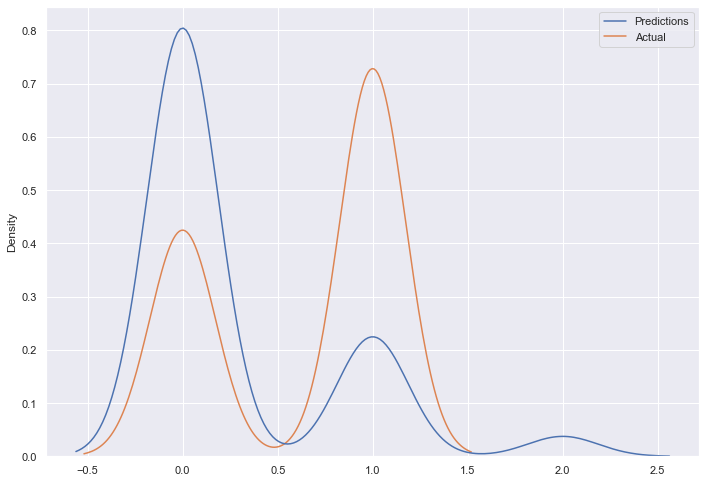

In [9]:
results = pd.DataFrame(prediction, columns = ['Predictions'])
results["Actual"] = list(y_test)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Standardization

In [45]:
for c in cancer_data.drop(["target"], axis=1):
    cancer_data[c]= (cancer_data[c] - cancer_data[c].mean())/cancer_data[c].std()

cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,0
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,0
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,0
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,0
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,0


In [46]:
x = cancer_data.drop(["target"], axis = 1)
y= cancer_data["target"] 

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#### Decission Tree

In [48]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy_score(np.array(y_test),prediction,normalize=True)

0.9298245614035088

<AxesSubplot: ylabel='Density'>

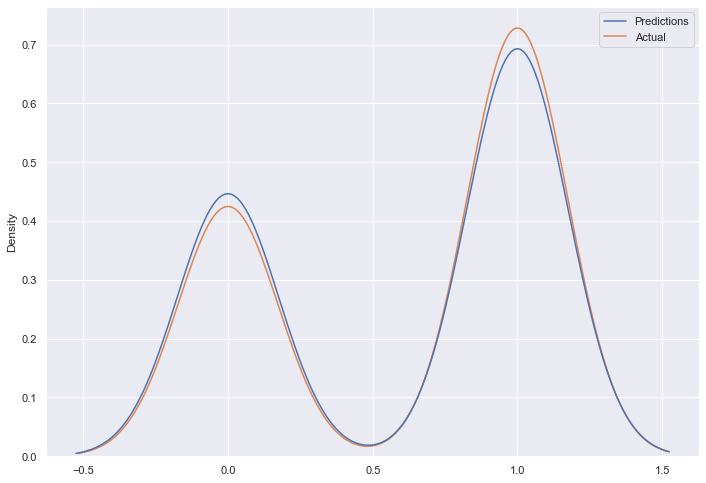

In [49]:
results = pd.DataFrame(prediction, columns = ['Predictions'])
results["Actual"] = list(y_test)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

#### Random Forest

In [13]:
model = RandomForestClassifier(n_estimators=20,random_state=42)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy_score(np.array(y_test),prediction,normalize=True)

0.9707602339181286

<AxesSubplot: ylabel='Density'>

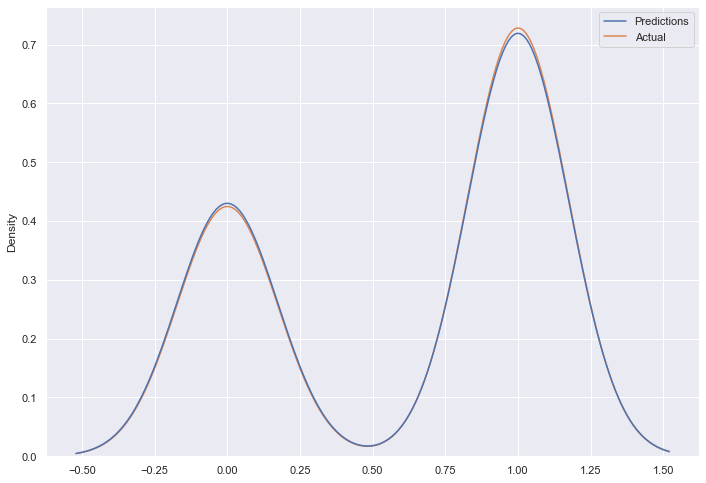

In [14]:
results = pd.DataFrame(prediction, columns = ['Predictions'])
results["Actual"] = list(y_test)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

#### SVC

In [15]:
model= svm.SVC()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy_score(np.array(y_test),prediction,normalize=True)

0.9707602339181286

<AxesSubplot: ylabel='Density'>

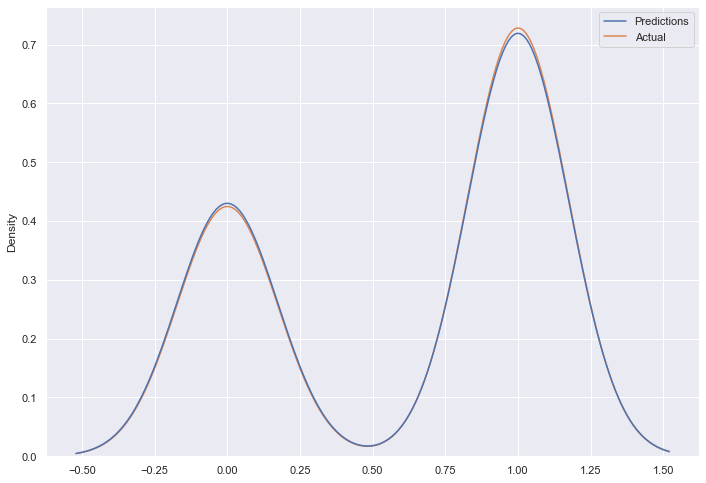

In [16]:
results = pd.DataFrame(prediction, columns = ['Predictions'])
results["Actual"] = list(y_test)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

#### KNN

In [36]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy_score(np.array(y_test),prediction,normalize=True)

0.9590643274853801

<AxesSubplot: ylabel='Density'>

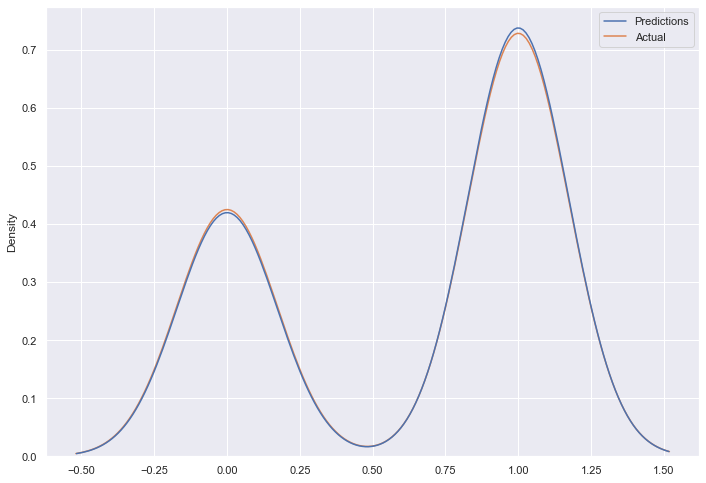

In [37]:
results = pd.DataFrame(prediction, columns = ['Predictions'])
results["Actual"] = list(y_test)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

#### KMeans

In [17]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model.fit(x_train)
prediction = model.predict(x_test)
accuracy_score(np.array(y_test),prediction,normalize=True)

0.06432748538011696

<AxesSubplot: ylabel='Density'>

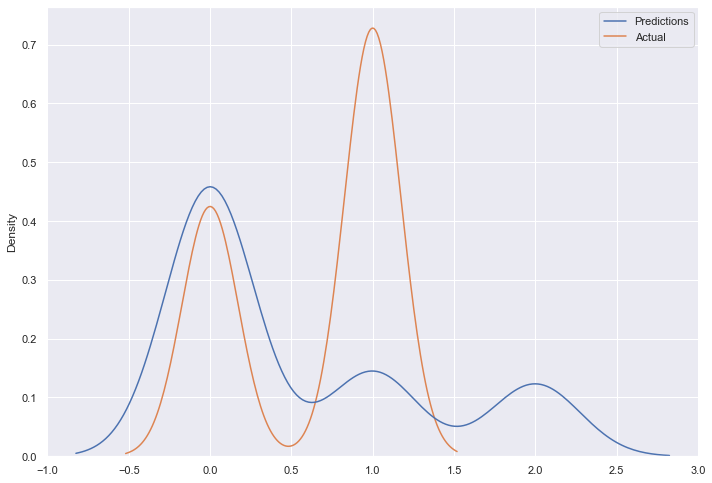

In [18]:
results = pd.DataFrame(prediction, columns = ['Predictions'])
results["Actual"] = list(y_test)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)